# CE9010: Introduction to Data Science (Project)
# Semester 2 2017/18
## Group 1: Jazlyn Chuah, Zachary, Teo Hwee Leng

### Step 1: Identifying a data problem to solve
With many data science projects available, we decided to work with a project that has been around for quite a while - Boston Housing Prices. The objective of our project is to predict the housing prices in Boston as accurately as possible, given the various factors.

We decided to gather our data from the UCI Machine Learning Repository, where the required data set is publicly available.

### Step 2: Data acquisition
To acquire the data, we decided to use the following modules: requests and pandas. This would mean that users will be able to obtain the data set while running the codes rather than having to download the csv file in advance. To make it more convenient, we import all the necessary libraries first.

In [8]:
# Importing all the necessary libraries
import requests
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
#import statsmodels.api as sm
import seaborn as sns

# Special matplotlib argument for improved plots
from matplotlib import rcParams

%matplotlib inline
sns.set(rc={"figure.figsize": (10, 8)})

In [9]:
# Pulling the data
# Using requests to retrieve the data from the website
r = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

# Splitting the data in the file
data = r.text.replace('\n', ' ').split(" ")
data = list(filter(lambda x: x != '', data))

# Putting the data under the different columns.
feats = ["CRIM","ZN","INDUS","CHAS","NOX","RM", "AGE","DIS", "RAD", "TAX","PTRATIO", "B", "LSTAT", "MEDV"] 
df = pd.DataFrame(columns=feats)
num = int(len(data)/14)
for i in range(num):
    df.loc[i] = data[i*14:i*14+14]
    
# Save the new data file in csv format
df.to_csv("housing.csv", index=False)

In [10]:
# Read into dataframe
data = pd.read_csv("housing.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


To have an idea of how big a data we are working with, we print the shape of the data.

In [11]:
print(data.shape)

(506, 14)


We see that there are 506 rows and 14 coloumns. This means that there are 506 rows of data that we can work with and 14 features for each row.

The 14 features are:
'CRIM'    - per capital crime rate per town <br>
'ZN'      - proportion of residential land zoned for lots over 25,000 sq. ft. <br>
'INDUS'   - proportion of non-retail business acres per town <br>
'CHAS'    - Charles River dummy variable (=1 if tract bounds river; 0 otherwise) <br>
'NOX'     - nitric oxides concentration (parts per 10 million) <br>
'RM'      - average number of rooms per dwelling <br>
'AGE'     - proportion of owner-occupied units built prior to 1940 <br>
'DIS'     - weighted distances to five Boston employment centres <br>
'RAD'     - index of accessibility to radical highways <br>
'TAX'     - full-value property-tax rate per \$10,000 <br>
'PTRATIO' - pupil-teacher ratio by town <br>
'B'       - 1000 (Bk - 0.63)^2 where Bk is the proportion of blacks by town <br>
'LSTAT'   - percentage lower status of the population <br>
'MEDV'    - Median value of owner-occupied homes in \$1000's <br>

### Step 3 & 4: Data exploration & Pre-processing

Firstly, we checked for any missing values. Data points with missing values should be removed but in this case, there are no missing values from the data set.

In [12]:
# check for missing values
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Next, we want to analyse the target column: 'MEDV'. We want to know the distribution for the median value of owner-occupied homes in \$1000's

In [13]:
data['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

For us to get a better understanding of the distribution of the 'MEDV' variable, we will plot it using the distribution plot from the seaborn module. The distplot() function in the seaborn module will draw a histogram by default and we can have a look at a univariate distribution of our data.

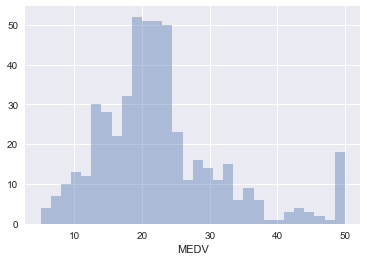

In [14]:
sns.distplot(data['MEDV'], bins=30, kde=False)
plt.show()

Next, we want to visualise the correlation between all the variables using a heatmap, which can also be found in the seaborn module.

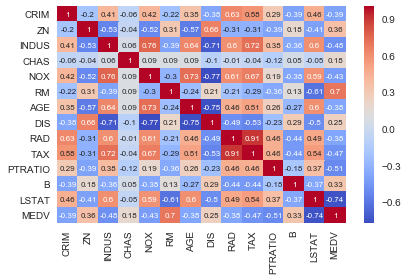

In [15]:
sns.heatmap(data.corr().round(2), cmap='coolwarm', annot=True, annot_kws={"size":8})
plt.tight_layout()
plt.show()

From the heatmap generated, we can see that the three variables with the strongest correlation to the feature 'MEDV' are 'LSTAT', 'RM' and 'PTRATIO'.

The heatmap can also be used to check for correlation between variables so that multicollinearity is not included into the linear regression. For example, both 'RAD' and 'TAX' have a high correlation value (0.91), hence they should not be used in a linear regression at the same time.

Next, we try to view the relationship between each variable against the target variable 'MEDV'.

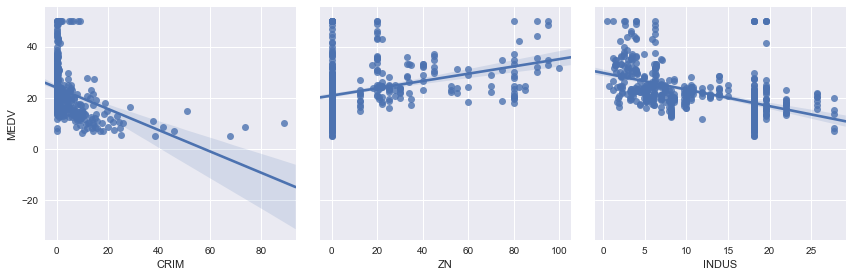

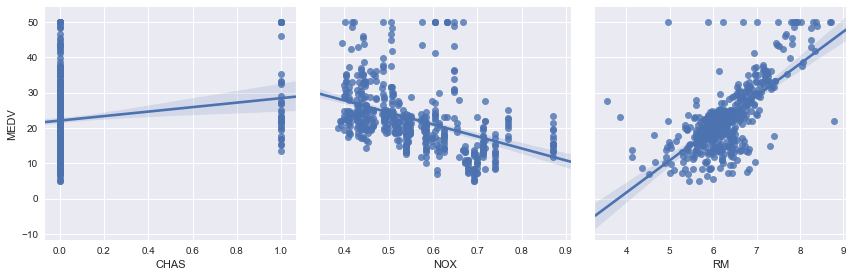

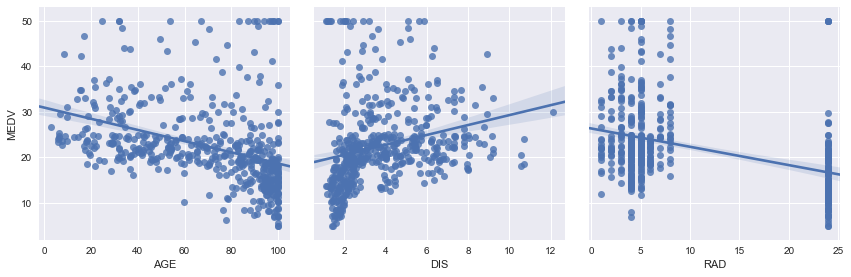

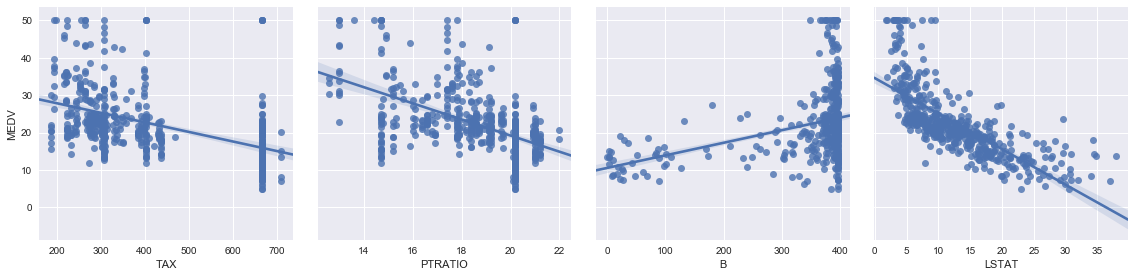

In [16]:
x_vars1 = ['CRIM','ZN','INDUS']
x_vars2 = ['CHAS','NOX','RM']          
x_vars3 = ['AGE','DIS', 'RAD']          
x_vars4 = ['TAX','PTRATIO', 'B', 'LSTAT']          
y_vars = ['MEDV']
sns.pairplot(data=data, x_vars=x_vars1, y_vars=y_vars, kind="reg", size=4)
sns.pairplot(data=data, x_vars=x_vars2, y_vars=y_vars, kind="reg", size=4)
sns.pairplot(data=data, x_vars=x_vars3, y_vars=y_vars, kind="reg", size=4)
sns.pairplot(data=data, x_vars=x_vars4, y_vars=y_vars, kind="reg", size=4)

After pair-plotting the 13 other features with 'MEDV', our targeted feature, we can cross-validate these pairplots with our findings from the heatmap. For example, we can confirm that the three variables with the strongest relation to 'MEDV' are 'LSTAT', 'RM' and 'PTRATIO' from the pairplots, which corresponds to the results that we have observed from the heatmap. Also, from the various pairplots, we can see that there are some other variables that have a moderate correlation to 'MEDV' and they are 'INDUS', 'NOX' and 'TAX'.

We can see that the pairplots generated algins with our intuition that:
<br>
1) An increase in the value of 'RM' would generally result in the increase of 'MEDV'. <br>
2) An increase in the value of 'LSTAT' would decrease the value of 'MEDV'. <br>
3) An increase in value of 'PTRATIO' would decrease the value of 'MEDV'.

Next, we want to create a X and y matrices such that it stores the values of 'MEDV' as well as the other features. 

In [17]:
# Creating the matrix
X = data.drop('MEDV', axis = 1)
y = data['MEDV']

Next, we shuffle the data so that it will be randomised. We then split the data into the train set and the test set.

In [18]:
# Splitting the data into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


### Step 5: Data Analysis

After splitting the data into the train set and test set, we attempt to apply alogrithms to solve our data problem.

We first try to apply linear agression to solve our data problem.

In [19]:
# Import linear regression function from scikit-learn
from sklearn.linear_model import LinearRegression

# Running linear regression function and fitting it into the model.
lm = LinearRegression()
model = lm.fit(X_train, y_train)
# Print the coefficents
#print("Linear coefficients: ", model.coef_)

y_pred = lm.predict(X_test)

# Accuracy of the prediction
confidence = lm.score(X_test, y_test)
# Print the accuracy of the prediction
print("Prediction accuracy: ", confidence)

Linear coefficients:  [-1.30799852e-01  4.94030235e-02  1.09535045e-03  2.70536624e+00
 -1.59570504e+01  3.41397332e+00  1.11887670e-03 -1.49308124e+00
  3.64422378e-01 -1.31718155e-02 -9.52369666e-01  1.17492092e-02
 -5.94076089e-01]
Prediction accuracy:  0.7334492147453093


Next, we put the coefficients of the models into a table with the coefficient values in a column. 

In [24]:
coefficients = pd.DataFrame(model.coef_,X.columns)
coefficients.columns = ['Coefficients']
coefficients

,Coefficients
CRIM,-0.130800
ZN,0.049403
INDUS,0.001095
CHAS,2.705366
NOX,-15.957050
RM,3.413973
AGE,0.001119
DIS,-1.493081
RAD,0.364422
TAX,-0.013172


After which, we use a scatter plot to display the true 'MEDV' vs the predicted 'MEDV'. 

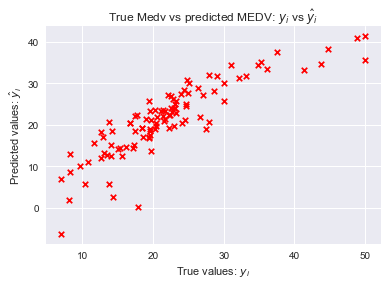

In [25]:
plt.scatter(y_test, y_pred, s=30, c='r', marker='x', linewidths=1)
plt.title("True Medv vs predicted MEDV: $y_i$ vs $\hat{y}_i$")
plt.xlabel("True values: $y_i$")
plt.ylabel("Predicted values: $\hat{y}_i$")
plt.show()

Another algorithm that we attempted to use to solve the data problem would be using k-fold cross validation.

Cross-validated scores: [ 0.64286835  0.6124552   0.51498797  0.78529513 -0.14696285 -0.00747687]
Cross-Predicted Accuracy:  0.5375933284585014


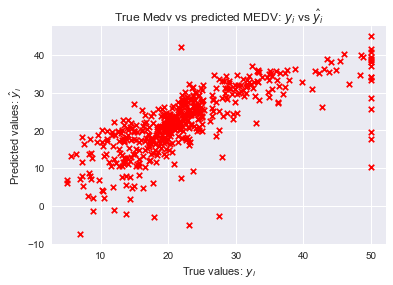

In [26]:
# K-fold Cross Validation
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform 6-fold cross validation
scores = cross_val_score(model, X, y, cv=6)
print("Cross-validated scores:", scores)
# Make cross validated predictions
predictions = cross_val_predict(model, X, y, cv=6)
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy: ", accuracy)

plt.scatter(y, predictions, s=30, c='r', marker='x', linewidths=1)
plt.title("True Medv vs predicted MEDV: $y_i$ vs $\hat{y}_i$")
plt.xlabel("True values: $y_i$")
plt.ylabel("Predicted values: $\hat{y}_i$")
plt.show()